In [21]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
rideData = pd.read_csv(ride_data_to_load)
cityData = pd.read_csv(city_data_to_load)
# Combine the data into a single dataset
df = pd.merge(rideData, cityData, on='city')
# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [22]:
# Obtain the x and y coordinates for each of the three city types
averageFarePerCity = df.groupby(['city'])[['fare']].agg(['mean'])
totalNumberOfRidesPerCity = df.groupby(['city'])[['ride_id']].agg(['count'])
cityType = df.groupby(['city'])[['type']]
# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


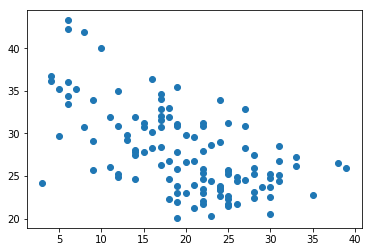

In [27]:
plt.scatter(totalNumberOfRidesPerCity,averageFarePerCity)

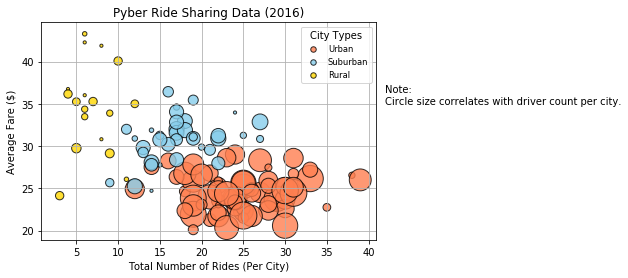

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [23]:
cType = df[['city', 'type']].drop_duplicates()
cType = cType.set_index('city')

In [24]:
cityGroup = pd.DataFrame(df.groupby(['city'])['fare'].mean())
cityGroup['rides'] = df.groupby('city')['ride_id'].count()
cityGroup['type'] = cType['type']
cityGroup['Total Fare'] = cityGroup['rides'] * cityGroup['fare']
cityGroup['drivers'] = df.groupby(['city'])['driver_count'].mean()
cityGroup.head()

,fare,rides,type,Total Fare,drivers
city,,,,,
Amandaburgh,24.641667,18,Urban,443.55,12
Barajasview,25.332273,22,Urban,557.31,26
Barronchester,36.422500,16,Suburban,582.76,11
Bethanyland,32.956111,18,Suburban,593.21,22
Bradshawfurt,40.064000,10,Rural,400.64,7


In [31]:
colors = ["yellow", "lightskyblue", "lightcoral", "lightskyblue"]
labels = ['Rural', 'Suburban', 'Urban']
explode = (0,0,0.1)

Text(0.5, 1.0, '% of Total Fares by City Type')

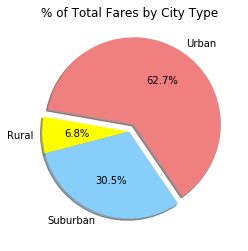

In [32]:
# Calculate Type Percents
cityTypeFare = pd.DataFrame(cityGroup.groupby('type')['Total Fare'].sum())
# Build Pie Chart
plt.pie(cityTypeFare, colors = colors, autopct="%1.1f%%", labels=labels, explode=explode, startangle=170, shadow = True)
# Save Figure
plt.title("% of Total Fares by City Type")

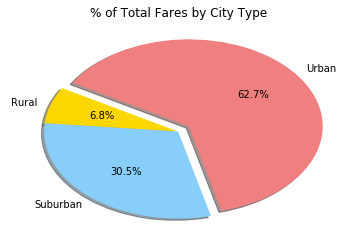

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5, 1.0, '% of Total Rides by City Type')

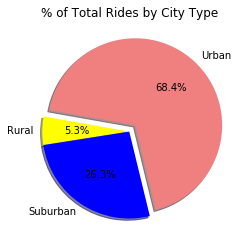

In [27]:
# Calculate Ride Percents
cityTypeRides = pd.DataFrame(cityGroup.groupby('type')['rides'].sum())
# Build Pie Chart
plt.pie(cityTypeRides, colors = colors, autopct="%1.1f%%", labels=labels, explode=explode, startangle=170, shadow = True)
# Save Figure
plt.title("% of Total Rides by City Type")
# Save Figure


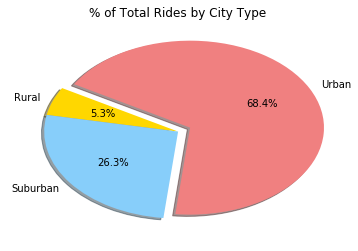

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

Text(0.5, 1.0, '% of Total Rides by City Type')

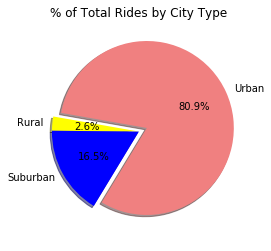

In [28]:
# Calculate Ride Percents
cityTypeDrivers = pd.DataFrame(cityGroup.groupby('type')['drivers'].sum())
# Build Pie Chart
plt.pie(cityTypeDrivers, colors = colors, autopct="%1.1f%%", labels=labels, explode=explode, startangle=170, shadow = True)
# Save Figure
plt.title("% of Total Rides by City Type")
# Save Figure



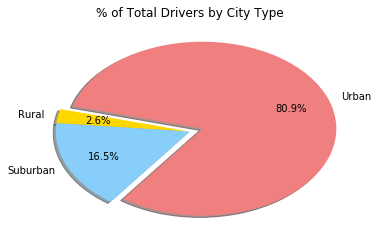

In [6]:
# Show Figure
plt.show()